In [1]:
# you have to find your smarter way

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#read file
df = pd.read_csv ('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
'''
Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
'''

'\nData Fields\ndatetime - hourly date + timestamp  \nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals\n'

In [5]:
df.shape

(10886, 12)

In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
'''
we have only 1 object
if this feature is important re-type it
else
drop it
'''

'\nwe have only 1 object\nif this feature is important re-type it\nelse\ndrop it\n'

In [9]:
#basically the data is too important so :
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day'] = pd.to_datetime(df['datetime']).dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [11]:
#so now we do not need datetime feature
df  = df.drop(["datetime"],axis=1)

In [12]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [13]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [14]:
'''
its meen the data does not have missing data
let show the diagram and some describe
'''

'\nits meen the data does not have missing data\nlet show the diagram and some describe\n'

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


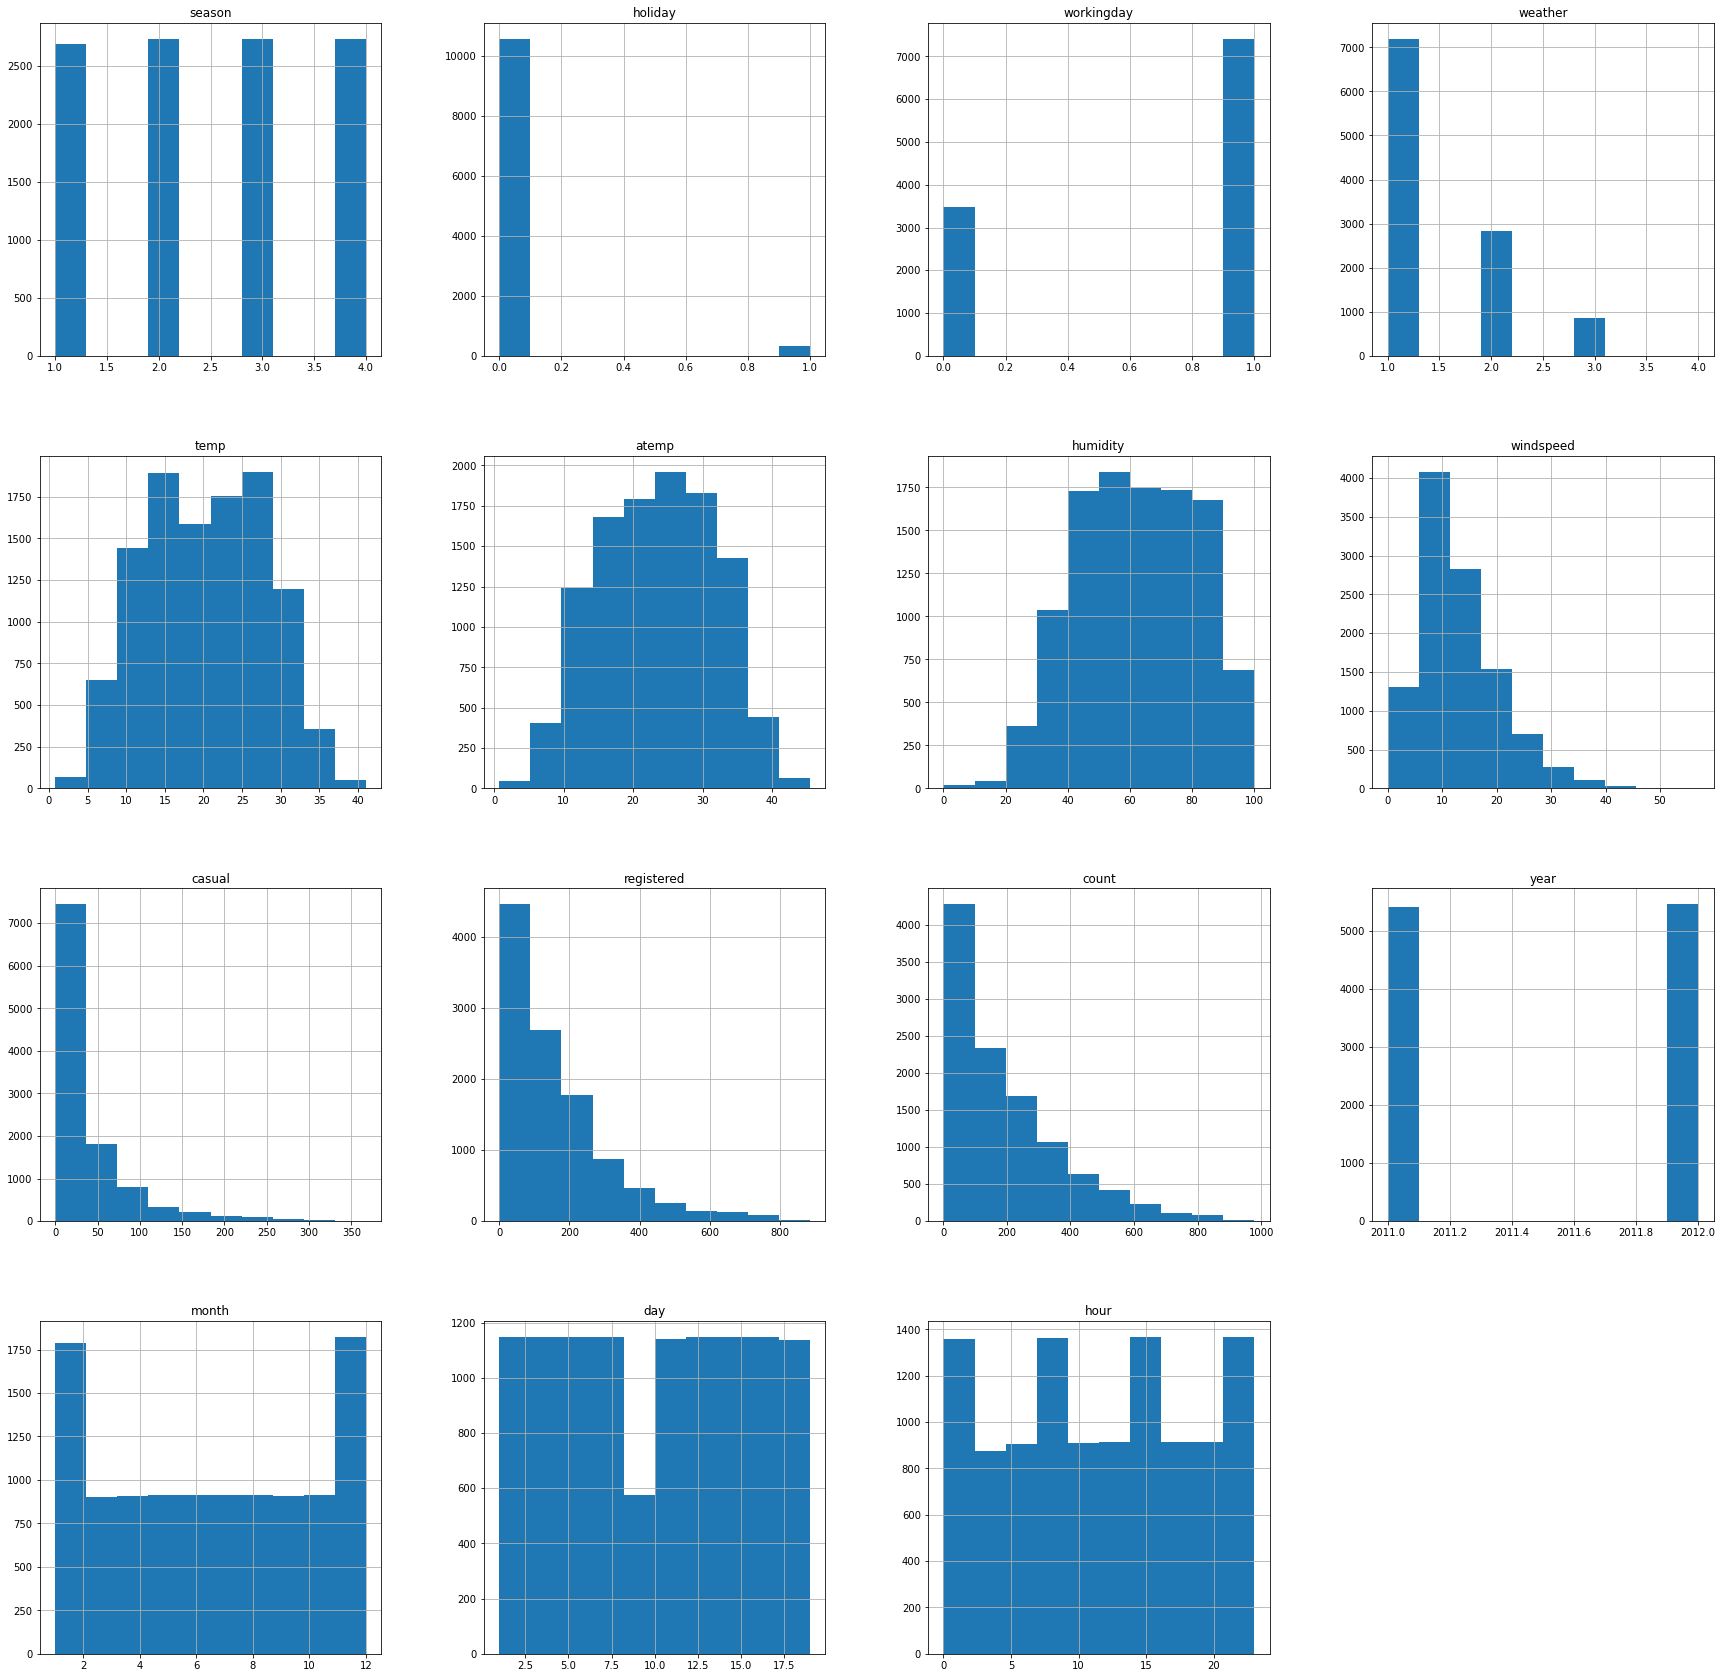

In [16]:
df.hist(figsize=(30,30))
plt.show()

In [17]:
'''
clearly we can see :
unform data
constant data
bool data
correlation feature
so lets zoom in
'''

'\nclearly we can see :\nunform data\nconstant data\nbool data\ncorrelation feature\nso lets zoom in\n'

In [18]:
df.corr(method ='kendall')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.026856,-0.007438,0.009707,0.193346,0.190105,0.139663,-0.103203,0.120411,0.132095,0.130245,-0.004371,0.904529,0.001319,-0.004968
holiday,0.026856,1.000000,-0.250491,-0.002115,0.001451,-0.002868,0.000153,0.007712,0.022976,-0.009478,-0.001336,0.012021,0.001628,-0.013278,-0.000296
workingday,-0.007438,-0.250491,1.000000,0.028050,0.025743,0.022817,-0.008274,0.014814,-0.165217,0.051604,-0.000315,-0.002482,-0.002958,0.008226,0.002314
weather,0.009707,-0.002115,0.028050,1.000000,-0.046364,-0.049588,0.324066,-0.005357,-0.112385,-0.082321,-0.091179,-0.005313,0.012570,-0.002596,-0.026393
temp,0.193346,0.001451,0.025743,-0.046364,1.000000,0.955043,-0.032077,-0.003516,0.413319,0.240250,0.280627,0.047156,0.176514,0.012658,0.094910
atemp,0.190105,-0.002868,0.022817,-0.049588,0.955043,1.000000,-0.027299,-0.025077,0.410275,0.237979,0.278226,0.044328,0.174098,0.008046,0.093771
humidity,0.139663,0.000153,-0.008274,0.324066,-0.032077,-0.027299,1.000000,-0.232840,-0.261280,-0.224517,-0.239583,-0.066070,0.140269,-0.007800,-0.194635
windspeed,-0.103203,0.007712,0.014814,-0.005357,-0.003516,-0.025077,-0.232840,1.000000,0.095200,0.090491,0.093955,-0.012376,-0.098526,0.026030,0.105053
casual,0.120411,0.022976,-0.165217,-0.112385,0.413319,0.410275,-0.261280,0.095200,1.000000,0.582213,0.666411,0.099747,0.111100,0.015624,0.328520
registered,0.132095,-0.009478,0.051604,-0.082321,0.240250,0.237979,-0.224517,0.090491,0.582213,1.000000,0.919346,0.191800,0.127366,0.013888,0.339485


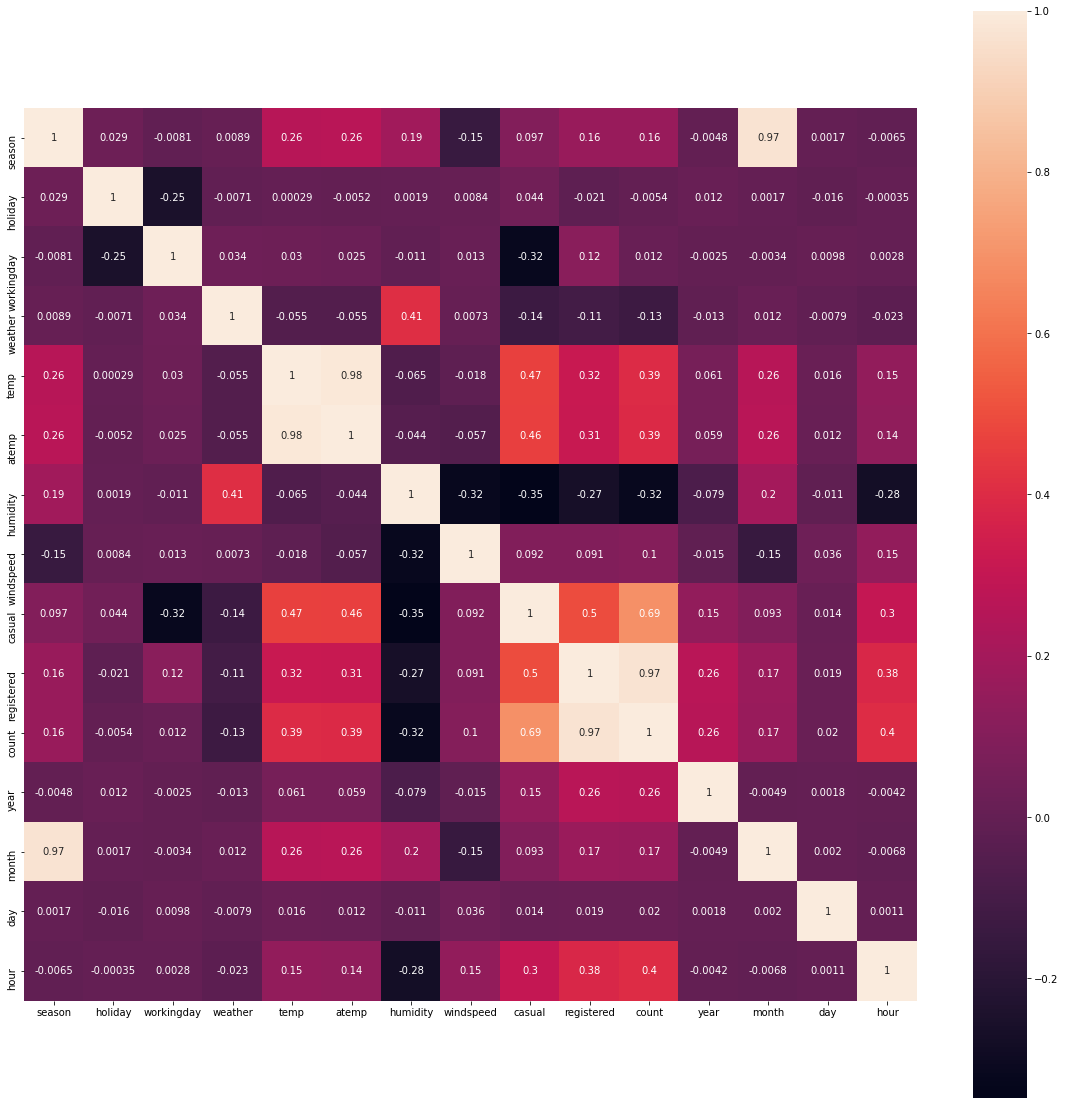

In [19]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(df.corr(),annot=True,square=True)

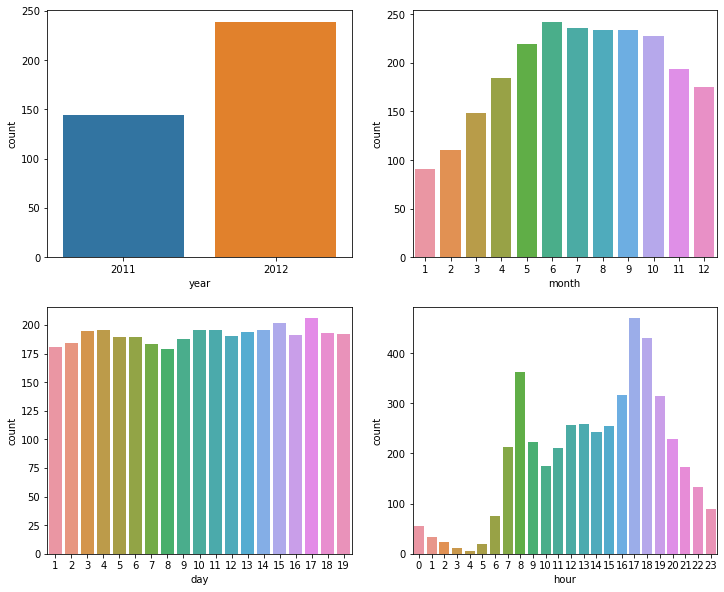

In [20]:
fig = plt.figure(figsize=(12,10))

# year - count
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = 'year', y = 'count', data = df.groupby('year')['count'].mean().reset_index())

#month - count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=df.groupby('month')['count'].mean().reset_index())

#day - count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=df.groupby('day')['count'].mean().reset_index())

#hour - count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=df.groupby('hour')['count'].mean().reset_index())

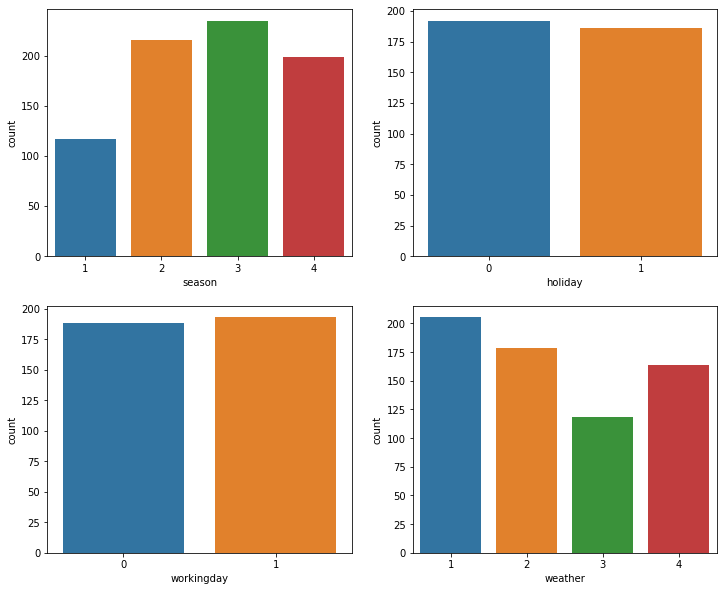

In [21]:
fig = plt.figure(figsize=[12,10])

# season - count
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=df.groupby('season')['count'].mean().reset_index())

#w holiday - count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=df.groupby('holiday')['count'].mean().reset_index())

# workingday - count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=df.groupby('workingday')['count'].mean().reset_index())

# weather - count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=df.groupby('weather')['count'].mean().reset_index())

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

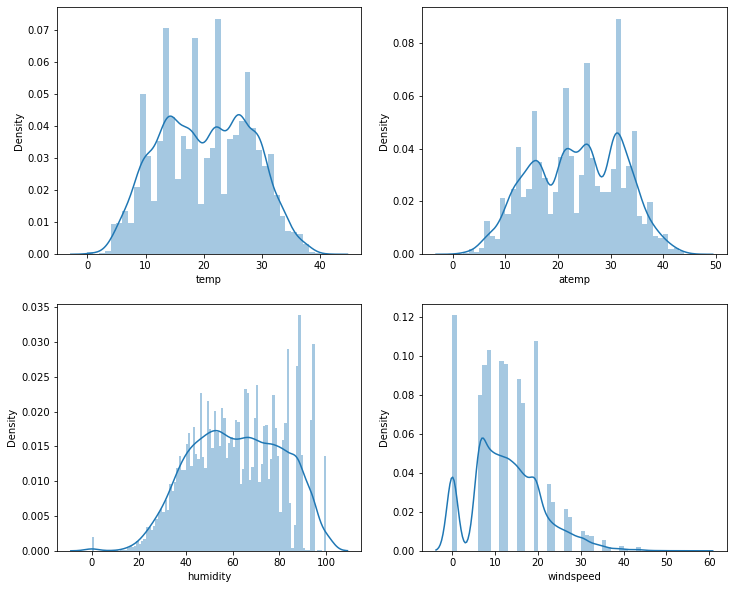

In [22]:
fig = plt.figure(figsize = (12,10))

# temp - count
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(df.temp,bins=range(int(df.temp.min()),int(df.temp.max()+1)))
# atemp - count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(df.atemp,bins=range(int(df.atemp.min()),int(df.atemp.max()+1)))

# humidity - count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(df.humidity,bins=range(int(df.humidity.min()),int(df.humidity.max()+1)))

# windspeed - count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(df.windspeed,bins=range(int(df.windspeed.min()),int(df.windspeed.max()+1)))


In [23]:
#by digrams and correlation we can drope some feature

In [24]:
df = df.drop(['season', 'holiday', 'atemp', 'casual', 'registered', 'year', 'day', 'workingday' ], axis=1)

In [25]:
df.head(20)

,weather,temp,humidity,windspeed,count,month,hour
0,1,9.84,81,0.0000,16,1,0
1,1,9.02,80,0.0000,40,1,1
2,1,9.02,80,0.0000,32,1,2
3,1,9.84,75,0.0000,13,1,3
4,1,9.84,75,0.0000,1,1,4
5,2,9.84,75,6.0032,1,1,5
6,1,9.02,80,0.0000,2,1,6
7,1,8.20,86,0.0000,3,1,7
8,1,9.84,75,0.0000,8,1,8
9,1,13.12,76,0.0000,14,1,9


In [26]:
#drope the out liers

In [27]:
dfWithoutOutliers = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())] 

In [28]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",dfWithoutOutliers.shape)

Shape Of The Before Ouliers:  (10886, 7)
Shape Of The After Ouliers:  (10739, 7)


In [29]:
# normlize the data

In [30]:
dfWithoutOutliers.columns

Index(['weather', 'temp', 'humidity', 'windspeed', 'count', 'month', 'hour'], dtype='object')

In [31]:
columns = dfWithoutOutliers.columns
x = dfWithoutOutliers[columns].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normlizedf = pd.DataFrame(x_scaled)
normlizedf.columns = columns

In [32]:
columns

Index(['weather', 'temp', 'humidity', 'windspeed', 'count', 'month', 'hour'], dtype='object')

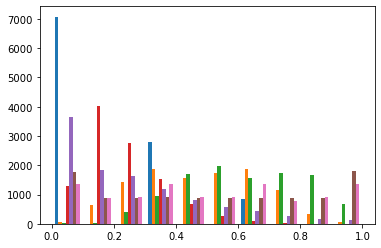

In [33]:
plt.hist(normlizedf)
plt.show()

In [35]:
x = np.array(normlizedf.drop(['count'] , axis = 1))
y = np.array(normlizedf['count'])

In [36]:
x.shape

(10739, 6)

In [37]:
y.shape

(10739,)

In [38]:
y = y.reshape(10739 , 1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [40]:
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_modle = LinearRegression()
pol_modle.fit(x_poly, y)

LinearRegression()

In [49]:
x_poly_test = poly_reg.fit_transform(x_test)
y_predicted_poly = pol_modle.predict(x_poly_test)

mean_squared_error(y_test, y_predicted_poly)

0.02166854205626227

In [51]:
import pickle

pickle.dump(pol_modle, open('./modle.sav', 'wb'))
pickle.dump(poly_reg, open('./polynomial.sav', 'wb'))